In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#fundamental libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

#sscikit learn  libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

%matplotlib inline
print("##################################")
print("Importing all required libraries")
print("##################################")

##################################
Importing all required libraries
##################################


In [3]:
print("#####################################")
print("loading data from drive successfully")
print("####################################")
df_diesel_price = pd.read_csv('/content/drive/MyDrive/diesel_price.csv')

#####################################
loading data from drive successfully
####################################


In [4]:
df_diesel_price.head()

,Sale_Date,Diesel_price
0,2022-04-16,3.65
1,2022-04-17,3.95
2,2022-04-18,3.86
3,2022-04-18,4.06
4,2022-04-21,3.83


##################################
Line Pollting the Diesel price
##################################


Text(0.5, 1.0, 'Day vs Diesel Price')

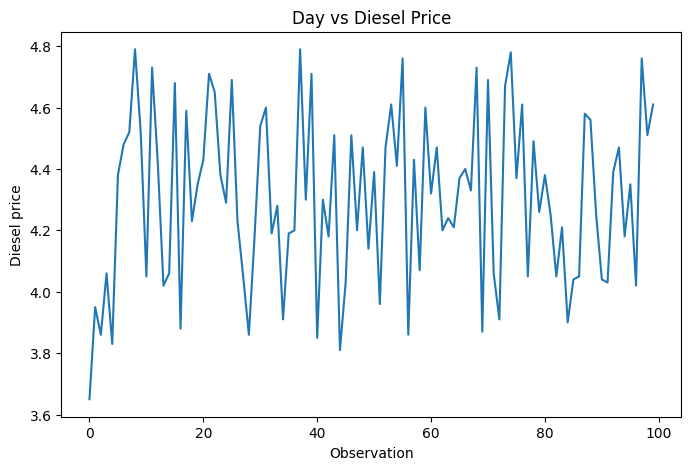

In [5]:
print("##################################")
print("Line Pollting the Diesel price")
print("##################################")
plt.figure(figsize=(8,5))
plt.plot(df_diesel_price["Diesel_price"])
plt.xlabel('Observation')
plt.ylabel('Diesel price')
plt.title('Day vs Diesel Price')

###########################
Box Pollt the Diesel price
###########################


Text(0.5, 1.0, 'Day vs Diesel Price')

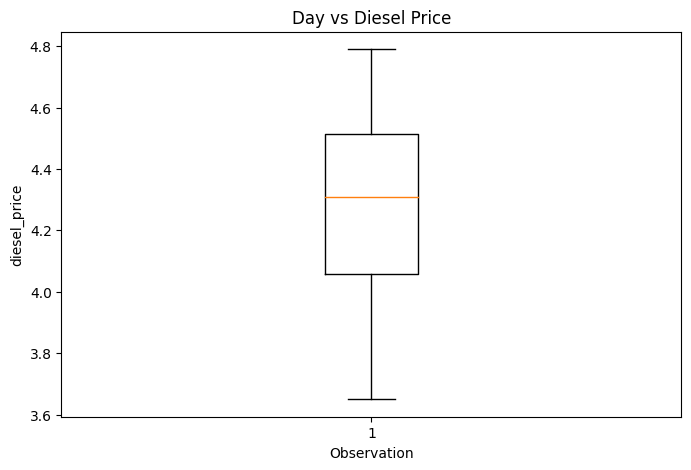

In [6]:
print("###########################")
print("Box Pollt the Diesel price")
print("###########################")
plt.figure(figsize=(8,5))
plt.boxplot(df_diesel_price["Diesel_price"])
plt.xlabel('Observation')
plt.ylabel('diesel_price')
plt.title('Day vs Diesel Price')

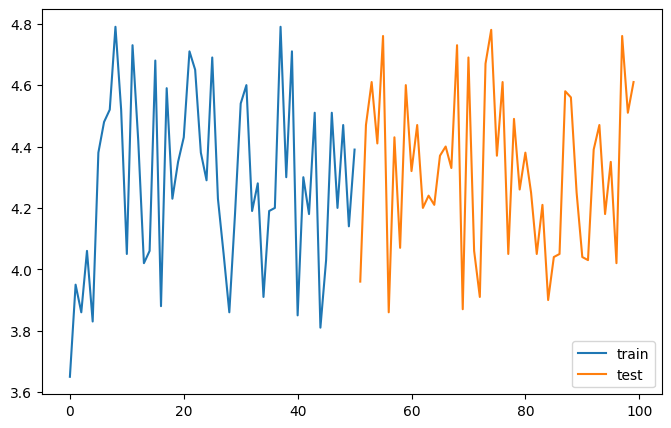

In [8]:
df1 = df_diesel_price["Diesel_price"]
train = df1.loc[:50]
test = df1.loc[51:]
plt.figure(figsize=(8,5))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [10]:
print("##################################")
print("        Diesel Dataset Split      ")
print("##################################")
train_ds = df_diesel_price["Diesel_price"].iloc[0:49].values
test_ds = df_diesel_price["Diesel_price"].iloc[49:99].values

##################################
        Diesel Dataset Split      
##################################


In [11]:
print("##################################")
print("        Diesel train dataset      ")
print("##################################")
train_ds

##################################
        Diesel train dataset      
##################################


array([3.65, 3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05,
       4.73, 4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71,
       4.65, 4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19,
       4.28, 3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51,
       3.81, 4.03, 4.51, 4.2 , 4.47])

In [12]:
print("##################################")
print("        Diesel test dataset      ")
print("##################################")
test_ds

##################################
        Diesel test dataset      
##################################


array([4.14, 4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 ,
       4.32, 4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69,
       4.06, 3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25,
       4.05, 4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39,
       4.47, 4.18, 4.35, 4.02, 4.76, 4.51])

In [13]:
print("########################################################################")
print("        For Model build X_train,Y_train,X_test and Y_test               ")
print("########################################################################")
X_train = train_ds[:-1]
y_train = train_ds[1:]
X_test = test_ds[:-1]
y_test = test_ds[1:]





########################################################################
        For Model build X_train,Y_train,X_test and Y_test               
########################################################################


In [14]:
print("X_train")
X_train

X_train


array([3.65, 3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05,
       4.73, 4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71,
       4.65, 4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19,
       4.28, 3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51,
       3.81, 4.03, 4.51, 4.2 ])

In [15]:
print("Y_train")
y_train


Y_train


array([3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05, 4.73,
       4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71, 4.65,
       4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19, 4.28,
       3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51, 3.81,
       4.03, 4.51, 4.2 , 4.47])

In [16]:
print("X_test")
X_test


X_test


array([4.14, 4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 ,
       4.32, 4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69,
       4.06, 3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25,
       4.05, 4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39,
       4.47, 4.18, 4.35, 4.02, 4.76])

In [17]:
print("Y_test")
y_test

Y_test


array([4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32,
       4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06,
       3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05,
       4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47,
       4.18, 4.35, 4.02, 4.76, 4.51])

In [18]:
print("##########################################################")
print("        Model build using various parameters              ")
print("##########################################################")
annmodel = Sequential()
annmodel.add(Dense(12, input_dim=1, activation='relu'))
annmodel.add(Dense(1))
annmodel.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = annmodel.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

##########################################################
        Model build using various parameters              
##########################################################
Epoch 1/200
48/48 [==============================] - 1s 2ms/step - loss: 20.4711
Epoch 2/200
48/48 [==============================] - 0s 2ms/step - loss: 14.9424
Epoch 3/200
48/48 [==============================] - 0s 2ms/step - loss: 10.6500
Epoch 4/200
48/48 [==============================] - 0s 1ms/step - loss: 7.1877
Epoch 5/200
48/48 [==============================] - 0s 1ms/step - loss: 4.5044
Epoch 6/200
48/48 [==============================] - 0s 2ms/step - loss: 2.5777
Epoch 7/200
48/48 [==============================] - 0s 2ms/step - loss: 1.3409
Epoch 8/200
48/48 [==============================] - 0s 2ms/step - loss: 0.6516
Epoch 9/200
48/48 [==============================] - 0s 1ms/step - loss: 0.3241
Epoch 10/200
48/48 [==============================] - 0s 1ms/step - loss: 0.1922
Epoch 11/200
48/48 

In [19]:
print("#############################################")
print("         Model Predition process             ")
print("#############################################")
y_pred_test_nn = annmodel.predict(X_test)
y_train_pred_nn = annmodel.predict(X_train)
print("R Square score (Train set):\t{:0.2f}".format(r2_score(y_train, y_train_pred_nn)))
print("R Square (Test set):\t{:0.2f}".format(r2_score(y_test, y_pred_test_nn)))
print("#############################################")

#############################################
         Model Predition process             
#############################################
2/2 [==============================] - 0s 4ms/step
R Square score (Train set):	-0.37
R Square (Test set):	-0.70
#############################################


In [20]:
print("#################################################")
print("         LSTM - Dataset preparations            ")
print("################################################")
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)
print("###################################################")
print('Train shape for LSTM: ', X_train_lmse.shape)
print('Test shape: for LSTM', X_test_lmse.shape)
print("###################################################")

#################################################
         LSTM - Dataset preparations            
################################################
###################################################
Train shape for LSTM:  (48, 1, 1)
Test shape: for LSTM (49, 1, 1)
###################################################


In [21]:
data_list1 = tf.stack(test)

In [22]:
data_list1

<tf.Tensor: shape=(49,), dtype=float64, numpy=
array([3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32, 4.47,
       4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06, 3.91,
       4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05, 4.21,
       3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47, 4.18,
       4.35, 4.02, 4.76, 4.51, 4.61])>

In [23]:
print("##########################################################")
print("        Model build using various parameters              ")
print("##########################################################")
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

##########################################################
        Model build using various parameters              
##########################################################
Epoch 1/200
48/48 [==============================] - 1s 2ms/step - loss: 18.0942
Epoch 2/200
48/48 [==============================] - 0s 2ms/step - loss: 17.4786
Epoch 3/200
48/48 [==============================] - 0s 2ms/step - loss: 16.6631
Epoch 4/200
48/48 [==============================] - 0s 2ms/step - loss: 15.4240
Epoch 5/200
48/48 [==============================] - 0s 2ms/step - loss: 13.3800
Epoch 6/200
48/48 [==============================] - 0s 2ms/step - loss: 10.1496
Epoch 7/200
48/48 [==============================] - 0s 2ms/step - loss: 6.0128
Epoch 8/200
48/48 [==============================] - 0s 2ms/step - loss: 2.4264
Epoch 9/200
48/48 [==============================] - 0s 2ms/step - loss: 0.6349
Epoch 10/200
48/48 [==============================] - 0s 2ms/step - loss: 0.1730
Epoch 11/200
48/

In [25]:
print("#############################################")
print("         Model Predition process             ")
print("#############################################")
y_pred_test_nn = annmodel.predict(y_test)
y_train_pred_nn = annmodel.predict(y_test)
print("R Square score on the Train set is:\t{:0.3f}".format(r2_score(data_list1, y_train_pred_nn)))
print("R Square score on the Test set is:\t{:0.3f}".format(r2_score(data_list1, y_pred_test_nn)))

#############################################
         Model Predition process             
#############################################
2/2 [==============================] - 0s 7ms/step
R Square score on the Train set is:	-0.658
R Square score on the Test set is:	-0.658


In [26]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

2/2 [==============================] - 0s 6ms/step
The R2 score on the Train set is:	0.009
The R2 score on the Test set is:	-0.128


In [28]:
anntest_mse = annmodel.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print("############################################################")
print("        Model Evaluation process (ANN and LSTM)             ")
print("###########################################################")
print('ANN: %f'%anntest_mse)
print('LSTM: %f'%lstm_test_mse)
print("###########################################################")

49/49 [==============================] - 0s 2ms/step - loss: 0.0742
############################################################
        Model Evaluation process (ANN and LSTM)             
###########################################################
ANN: 0.112011
LSTM: 0.074200
###########################################################


In [29]:
print("############################################################")
print("        Model Prediction process (ANN and LSTM)             ")
print("###########################################################")
ann_y_pred_test = annmodel.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)
print("###########################################################")

############################################################
        Model Prediction process (ANN and LSTM)             
###########################################################
2/2 [==============================] - 0s 5ms/step
###########################################################


###################################################################
        Line plot for ANN's Prediction for Diesel price             
###################################################################


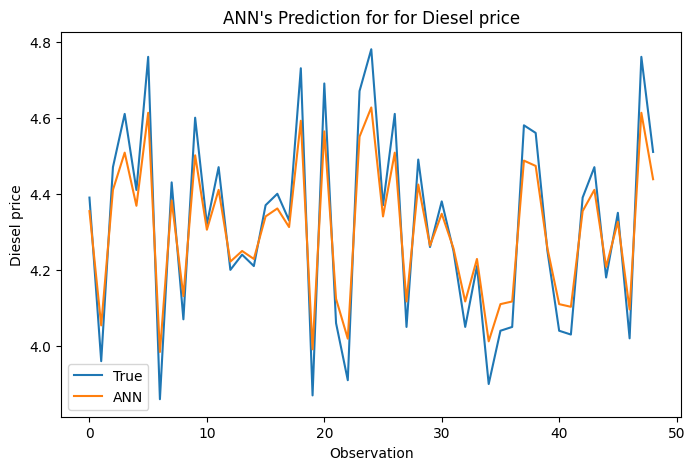

In [30]:
print("###################################################################")
print("        Line plot for ANN's Prediction for Diesel price             ")
print("###################################################################")
plt.figure(figsize=(8, 5))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='ANN')
plt.title("ANN's Prediction for for Diesel price")
plt.xlabel('Observation')
plt.ylabel('Diesel price')
plt.legend()
plt.show();

#####################################################################
        Line plot for LSTM's Prediction for Diesel price             
#####################################################################


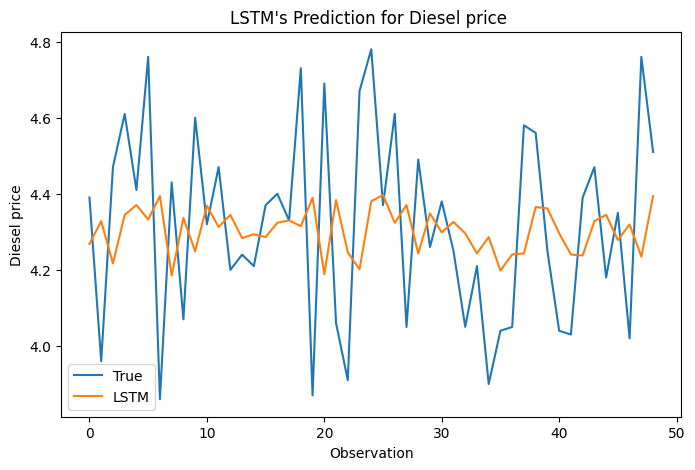

In [31]:
print("#####################################################################")
print("        Line plot for LSTM's Prediction for Diesel price             ")
print("#####################################################################")
plt.figure(figsize=(8, 5))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction for Diesel price ")
plt.xlabel('Observation')
plt.ylabel('Diesel price')
plt.legend()
plt.show();